In [1]:
import requests
import os
import zipfile
import pandas as pd
import json
import numpy as np
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = r'C:\Users\genin\Box Sync\MY DOCUMENTS\Precios Nola\data_clean_v2.csv'

# Load the CSV file into a DataFrame with a different encoding
df = pd.read_csv(file_path, encoding='latin-1')
no_include = ['review','sost','review_score','review_number','dates_in','dates_out','Year','Week','DayOfWeek', 'Date', 'City', 'distance', 'Languages.spoken', 'Room.Amenities', 'Activities', 'Off.site', 'Additional.charge', 
              'Services','Entertainment.and.family.services', 'General', 'Wellness' ]

df = df.drop(columns=no_include)
df

,Beds,Rooms,price,Bathroom,Towels,Bath.or.shower,Private.bathroom,Toilet,Free.toiletries,Shower,...,Sun.umbrellas,Sun.loungers.or.beach.chairs,Hammam,Hot.tub.Jacuzzi,Massage,Spa.and.wellness.centre,Fitness.centre,Sauna,English,Spanish
0,2.0,2.0,331.5,1,1,0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,1
1,1.0,1.0,460.0,1,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
2,3.0,1.0,306.0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1.0,350.0,1,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,1
4,1.0,1.0,140.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1313,1.0,1.0,180.0,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,1
1314,4.0,4.0,1280.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1315,5.0,4.0,296.4,1,1,1,1,1,0,1,...,0,0,0,0,1,1,0,1,0,1
1316,3.0,3.0,273.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


# Set up the dataset

In [2]:
import pycaret
from pycaret.regression import *

s = setup(data = df, target = 'price', session_id=123)

,Description,Value
0,Session id,123
1,Target,price
2,Target type,Regression
3,Original data shape,"(1318, 96)"
4,Transformed data shape,"(1318, 96)"
5,Transformed train set shape,"(922, 96)"
6,Transformed test set shape,"(396, 96)"
7,Numeric features,95
8,Rows with missing values,11.5%
9,Preprocess,True


In [4]:
best = compare_models(n_select=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,38.0968,7974.9986,85.4722,0.9541,0.1972,0.1112,6.0120
et,Extra Trees Regressor,32.5039,8012.5754,84.5501,0.9534,0.1799,0.0868,0.4550
xgboost,Extreme Gradient Boosting,37.3253,12683.4505,106.3773,0.9364,0.2116,0.1014,0.2810
rf,Random Forest Regressor,49.8392,12788.8501,107.6610,0.9290,0.2559,0.1652,0.4380
dt,Decision Tree Regressor,38.7500,14938.7875,115.5003,0.9192,0.2350,0.1112,0.0470
lightgbm,Light Gradient Boosting Machine,62.4443,17911.9313,131.0928,0.9079,0.2400,0.1608,0.6180
gbr,Gradient Boosting Regressor,102.2749,22317.6572,147.9046,0.8786,0.3857,0.3491,0.3360
knn,K Neighbors Regressor,103.2222,45894.6943,210.8232,0.7604,0.3624,0.2856,0.0440
br,Bayesian Ridge,174.6557,60301.4512,244.8551,0.6811,0.6849,0.5617,0.0620
ridge,Ridge Regression,175.0659,60543.4344,245.3276,0.6801,0.6898,0.5624,0.0330


Processing:   0%|          | 0/94 [00:00<?, ?it/s]

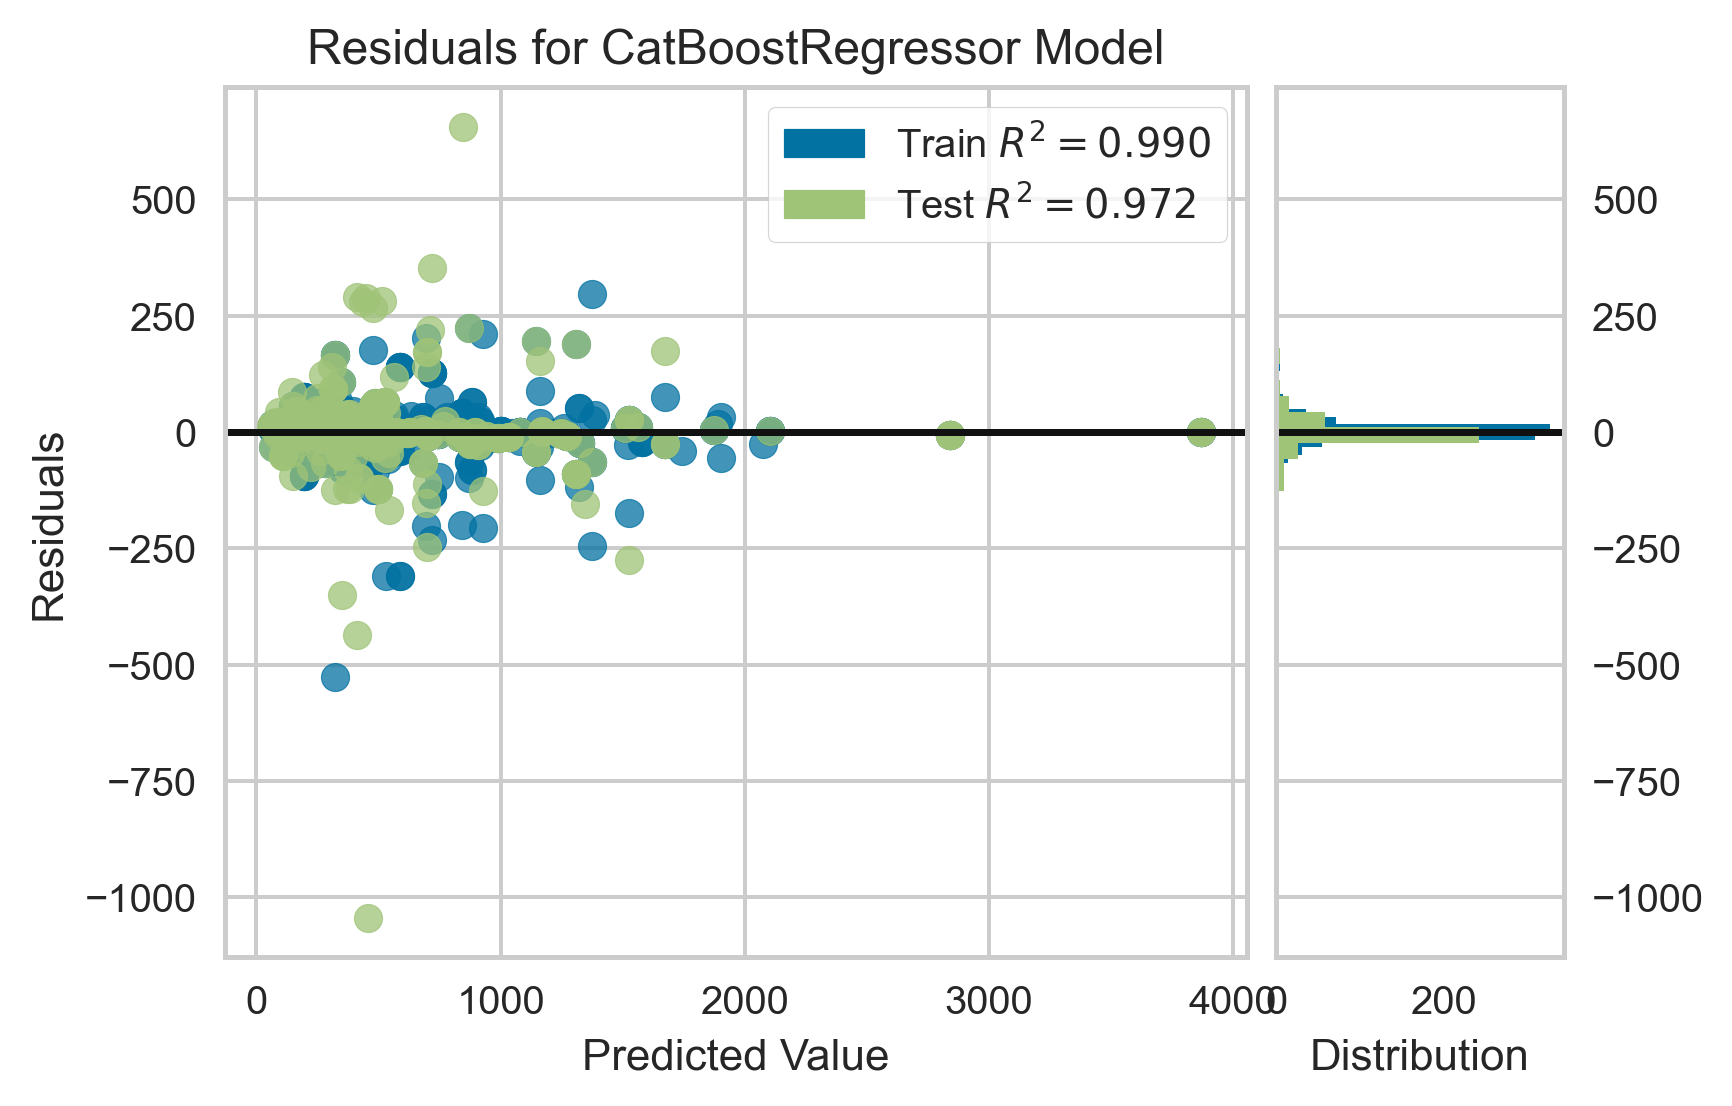

In [5]:
plot_model(best[0], plot = 'residuals', scale =4)

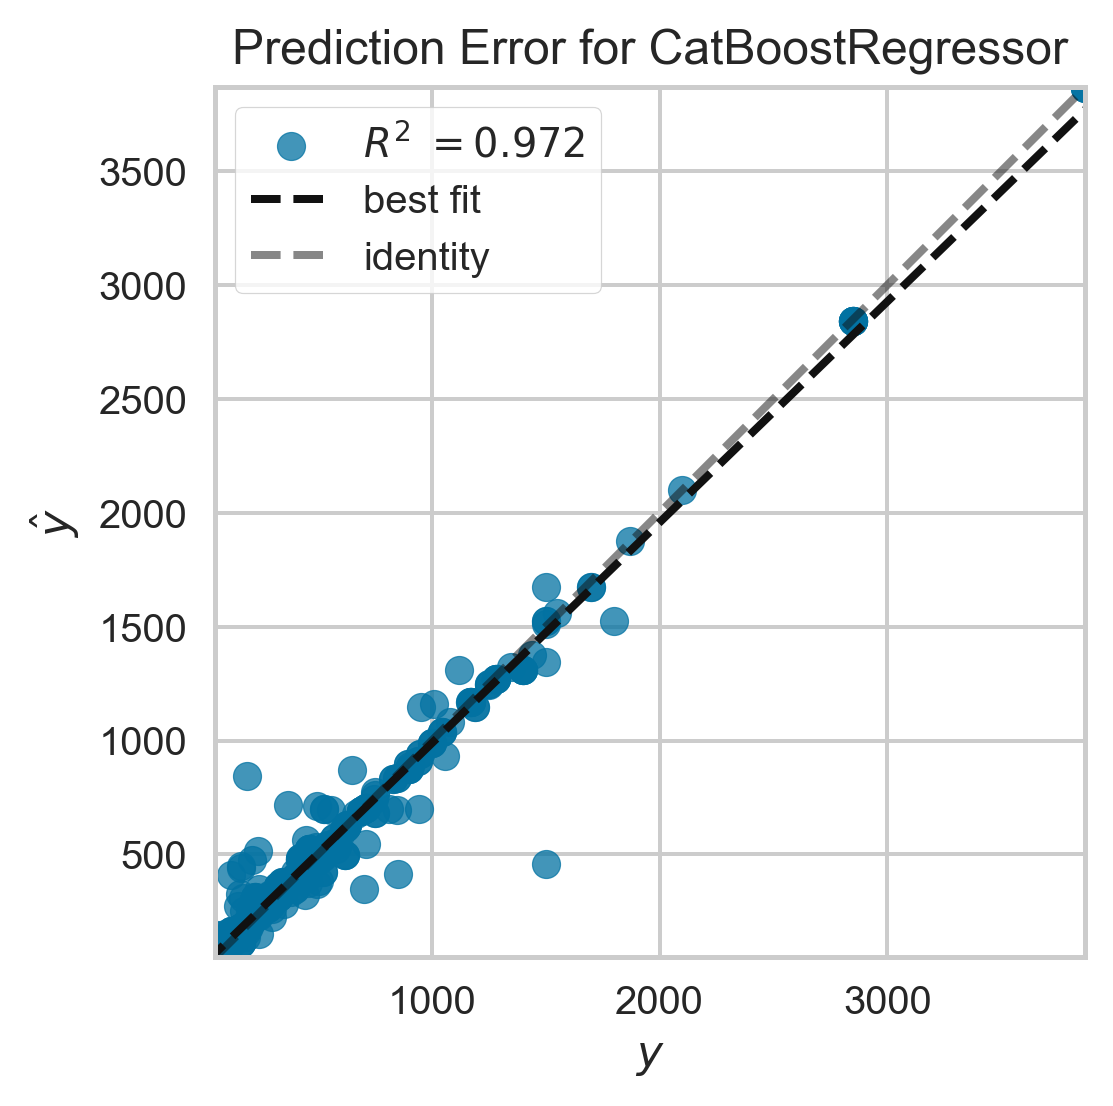

In [6]:
plot_model(best[0], plot = 'error', scale=4)

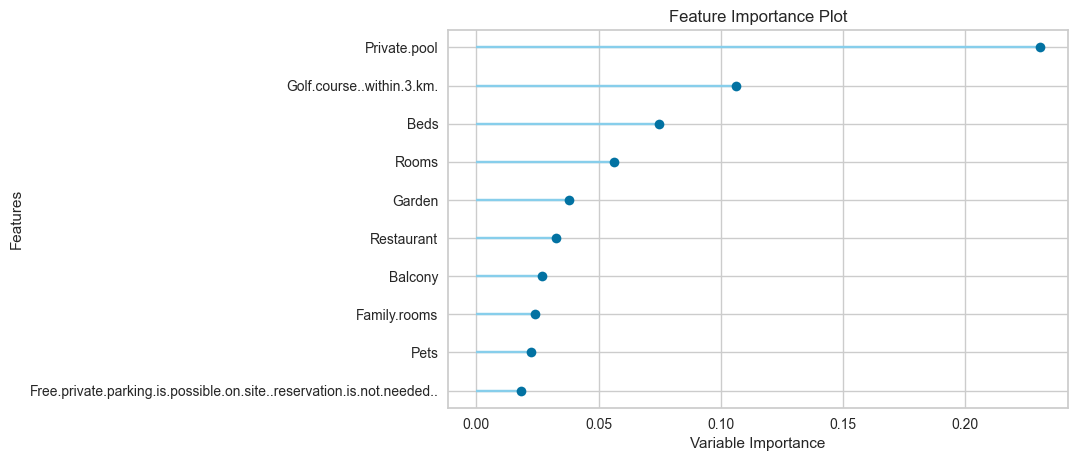

In [63]:
# plot feature importance
plot_model(best[0], plot = 'feature')

## Prediction

In [64]:
### New data set
# Replace 'your_file.csv' with the actual path to your CSV file
file_path = r'C:\Users\genin\Box Sync\MY DOCUMENTS\Precios Nola\nola_feat Juli.csv'

# Load the CSV file into a DataFrame with a different encoding
new_data = pd.read_csv(file_path, encoding='latin-1')
new_data = new_data.dropna(subset=['Bathroom'])
new_data

,Beds,Rooms,Bathroom,Towels,Bath.or.shower,Private.bathroom,Toilet,Free.toiletries,Shower,Bedroom,...,Sun.loungers.or.beach.chairs,Hammam,Hot.tub.Jacuzzi,Massage,Spa.and.wellness.centre,Fitness.centre,Sauna,Languages.spoken,English,Spanish
0,3,2,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,NaN,0,1
1,3,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,NaN,0,1
2,3,1,1,1,1,1,1,1,1,1,...,0,1,0,0,0,0,0,NaN,0,1


In [52]:
new_data = pd.DataFrame()
new_data['room'] = [1,2,3]*5
new_data

,room
0,1
1,2
2,3
3,1
4,2
5,3
6,1
7,2
8,3
9,1


In [56]:
prediction1 = predict_model(best[0],data = new_data)
prediction1['prediction_label']

0    317.104814
1    257.727957
2    311.515999
Name: prediction_label, dtype: float64

In [115]:
all_predictions = []
for i in range(3):  # Assuming you want to loop from 0 to 4
    # Make predictions using the i-th model
    prediction = predict_model(best[i], data=new_data)
    
    # Extract the 'prediction_label' column and store it in the list
    prediction_label = prediction['prediction_label']  # Replace 'Label' with your actual prediction column name
    all_predictions.append(prediction_label)
resulting_dataframe = pd.concat(all_predictions, axis=1)
resulting_dataframe

,prediction_label,prediction_label,prediction_label
0,317.104814,317.439597,339.000000
1,257.727957,240.827887,195.555556
2,311.515999,294.836774,339.000000


In [116]:
average_by_rows = resulting_dataframe.mean(axis=1)
sd_model_by_rows = resulting_dataframe.sd(axis=1)
sd_model_by_rows

0    324.514804
1    231.370467
2    315.117591
dtype: float64

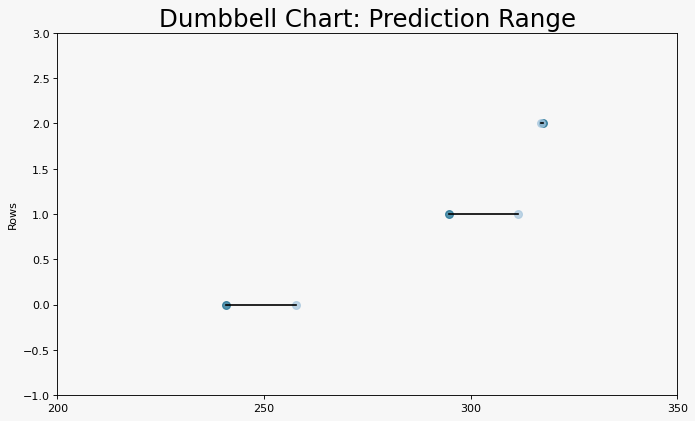

In [6]:
import matplotlib.lines as mlines
import pandas as pd
import matplotlib.pyplot as plt

# Your data
df = pd.DataFrame({
    'prediction_high': [317.104814, 257.727957, 311.515999],
    'prediction_low': [317.439597, 240.827887, 294.836774]
})

# Sort data
df.sort_values('prediction_high', inplace=True)
df.reset_index(inplace=True)

# Func to draw line segment
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]], color=color)
    ax.add_line(l)
    return l

# Figure and Axes
fig, ax = plt.subplots(1, 1, figsize=(10, 6), facecolor='#f7f7f7', dpi=80)

# Vertical Lines
for x in [0.05, 0.10, 0.15]:
    ax.vlines(x=x, ymin=0, ymax=len(df), color='black', alpha=1, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=df.index, x=df['prediction_low'], s=50, color='#0e668b', alpha=0.7)
ax.scatter(y=df.index, x=df['prediction_high'], s=50, color='#a3c4dc', alpha=0.7)

# Line Segments
for i, p1, p2 in zip(df.index, df['prediction_low'], df['prediction_high']):
    newline([p1, i], [p2, i])

# Decoration
ax.set_facecolor('#f7f7f7')
ax.set_title("Dumbbell Chart: Prediction Range", fontdict={'size': 22})
ax.set(xlim=(200, 350), ylim=(-1, len(df)), ylabel='Rows')
ax.set_xticks([200, 250, 300, 350])
plt.show()



# Review Prediction

In [1]:
import requests
import os
import zipfile
import pandas as pd
import json
import numpy as np
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
file_path = r'C:\Users\genin\Box Sync\MY DOCUMENTS\Precios Nola\data_clean_v2.csv'

# Load the CSV file into a DataFrame with a different encoding
df = pd.read_csv(file_path, encoding='latin-1')
no_include = ['review','sost','review_number','dates_in','dates_out','Year','Week','DayOfWeek', 'Date', 'City', 'distance', 'Languages.spoken', 'Room.Amenities', 'Activities', 'Off.site', 'Additional.charge', 
              'Services','Entertainment.and.family.services', 'General', 'Wellness' ]

df = df.drop(columns=no_include)
df.dropna(subset=['review_score'], inplace=True)
df

,Beds,Rooms,review_score,price,Bathroom,Towels,Bath.or.shower,Private.bathroom,Toilet,Free.toiletries,...,Sun.umbrellas,Sun.loungers.or.beach.chairs,Hammam,Hot.tub.Jacuzzi,Massage,Spa.and.wellness.centre,Fitness.centre,Sauna,English,Spanish
1,1.0,1.0,94.0,460.0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,1.0,1.0,92.0,350.0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
4,1.0,1.0,79.0,140.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,3.0,2.0,94.0,378.0,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
6,2.0,1.0,95.0,200.0,1,1,1,1,1,0,...,1,1,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,6.0,4.0,98.0,266.4,1,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,1
1312,4.0,2.0,95.0,100.0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1315,5.0,4.0,1.0,296.4,1,1,1,1,1,0,...,0,0,0,0,1,1,0,1,0,1
1316,3.0,3.0,84.0,273.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1


In [2]:
import pycaret
from pycaret.regression import *

s = setup(data = df, target = 'review_score', session_id=123)

,Description,Value
0,Session id,123
1,Target,review_score
2,Target type,Regression
3,Original data shape,"(1021, 97)"
4,Transformed data shape,"(1021, 97)"
5,Transformed train set shape,"(714, 97)"
6,Transformed test set shape,"(307, 97)"
7,Numeric features,96
8,Rows with missing values,10.5%
9,Preprocess,True


In [3]:
best = compare_models(n_select=10)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)


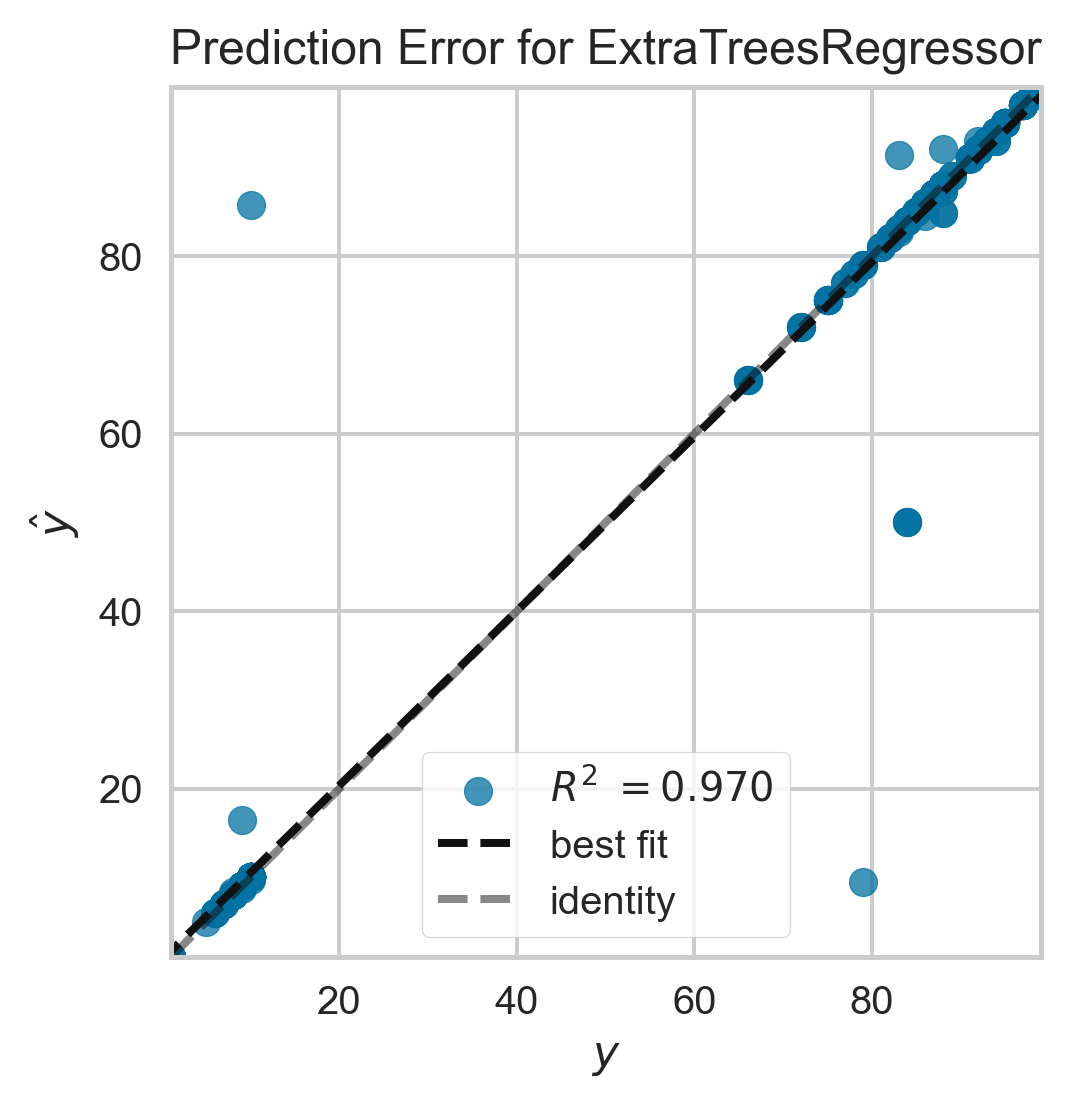

In [10]:
plot_model(best[4], plot = 'error', scale=4)

In [11]:
### New data set
# Replace 'your_file.csv' with the actual path to your CSV file
file_path = r'C:\Users\genin\Box Sync\MY DOCUMENTS\Precios Nola\nola_feat Juli.csv'

# Load the CSV file into a DataFrame with a different encoding
new_data = pd.read_csv(file_path, encoding='latin-1')
new_data = new_data.dropna(subset=['Bathroom'])
new_data['price'] = [310,231,316]
new_data

,Beds,Rooms,Bathroom,Towels,Bath.or.shower,Private.bathroom,Toilet,Free.toiletries,Shower,Bedroom,...,Hammam,Hot.tub.Jacuzzi,Massage,Spa.and.wellness.centre,Fitness.centre,Sauna,Languages.spoken,English,Spanish,price
0,3,2,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,NaN,0,1,310
1,3,2,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,NaN,0,1,231
2,3,1,1,1,1,1,1,1,1,1,...,1,0,0,0,0,0,NaN,0,1,316


In [13]:
all_predictions = []
for i in range(6):  # Assuming you want to loop from 0 to 4
    # Make predictions using the i-th model
    prediction = predict_model(best[i], data=new_data)
    
    # Extract the 'prediction_label' column and store it in the list
    prediction_label = prediction['prediction_label']  # Replace 'Label' with your actual prediction column name
    all_predictions.append(prediction_label)
resulting_dataframe = pd.concat(all_predictions, axis=1)
resulting_dataframe

,prediction_label,prediction_label,prediction_label,prediction_label,prediction_label,prediction_label
0,58.482462,73.035934,48.305,52.202994,47.99,81.0
1,61.241739,60.832645,50.200,65.994099,48.12,81.0
2,55.591515,78.189430,62.790,86.367853,82.72,83.0


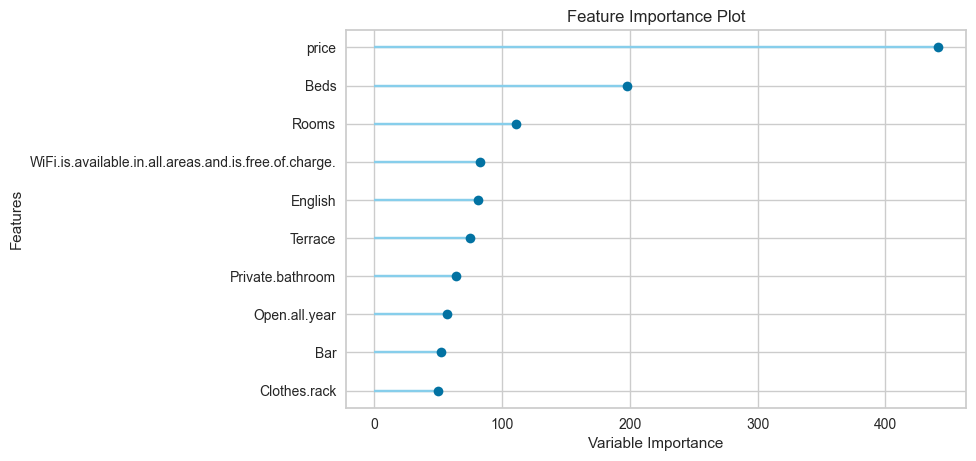

In [16]:
plot_model(best[3], plot = 'feature')

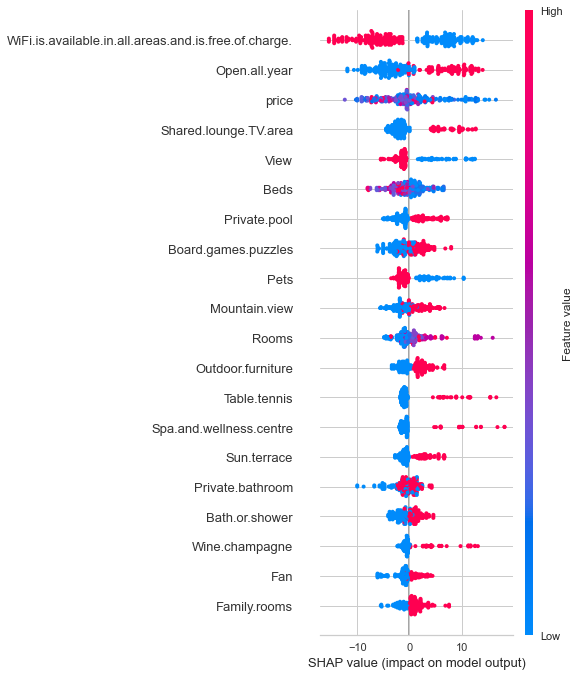

In [17]:
interpret_model(best[3], plot = 'summary')

In [21]:
interpret_model(best[3], plot = 'reason', observation = 6)